In [1]:
import platform
import os

if platform.system() == 'Linux':  # if on Colab
    print('Mounting google drive...')
    from google.colab import drive
    drive.mount('/content/drive')
    %cd "/content/drive/My Drive"
    %cd "brenner_swenson_computer_vision/emotion_recognition"

try:
    os.chdir('src/')
except:
    pass

from pathlib import Path
from pprint import pprint

from src import test as test

# dynamically get full file paths regardless of environment
PROJECT_DIR = Path(os.path.dirname(os.path.abspath(''))).parent.absolute()
DATASET_DIR = str(PROJECT_DIR.joinpath("cw_dataset"))
VIDEOS_DIR = str(PROJECT_DIR.joinpath("video"))

### Test SIFT-SVM

INFO:utils:Successfully loaded 3068 images
INFO:utils:Beginning clustering process for 3066 images
100%|██████████| 3066/3066 [00:00<00:00, 3075.22it/s]
INFO:utils:Successfully loaded 3068 images
c:\users\brenner\documents\python_projects\emotion_recognition\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


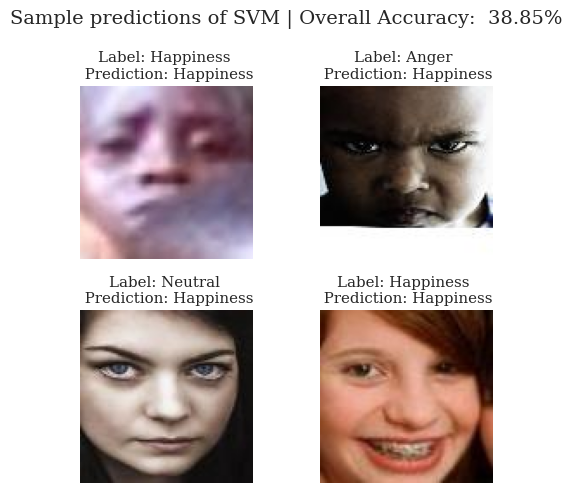

{'accuracy': 38.85267275097783,
 'f1_score': 0.24828954922074511,
 'precision': 0.339240553054545,
 'recall': 0.38852672750977835}


In [3]:
em = test.EmotionRecognition(DATASET_DIR + "/test", model_type="SVM")
preds, metrics = em.predict_all(visualise=True)
pprint(metrics)

### Test HOG-MLP

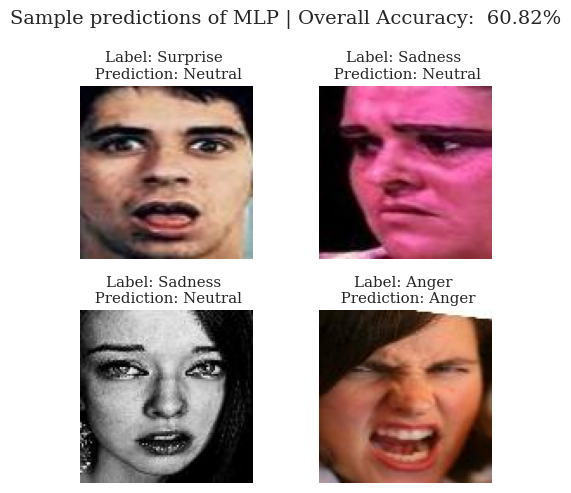

{'accuracy': 60.821382007822685,
 'f1_score': 0.6339437398067965,
 'precision': 0.6824449133999967,
 'recall': 0.6082138200782269}


In [4]:
em = test.EmotionRecognition(DATASET_DIR + "/test", model_type="MLP")
preds, metrics = em.predict_all(visualise=True)
pprint(metrics)

### Test CNN

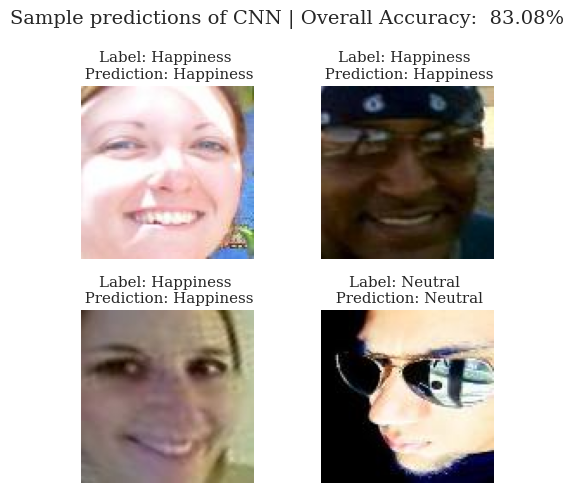

{'accuracy': 83.08344198174707,
 'f1_score': 0.8319011871631743,
 'precision': 0.834651722350303,
 'recall': 0.8308344198174706}


In [2]:
em = test.EmotionRecognition(DATASET_DIR + "/test", model_type="CNN")
preds, metrics = em.predict_all(visualise=True)
pprint(metrics)

### Test CNN on Video

In [ ]:
erv = test.EmotionRecognitionVideo(model_type="CNN")
frames = erv.predict_video(str(Path(VIDEOS_DIR).joinpath("pexels-rodnae-productions-6518200.mp4")))